# Assignment 07 - Exercise 01
Classify the iris data set using k-nearest neighbors and analyze the hyperparameter $k$

In [1]:
from sklearn import datasets
iris = datasets.load_iris()

#print(iris)
X = iris['data']
t = iris['target']
print(X.shape)
print(t.shape)

(150, 4)
(150,)


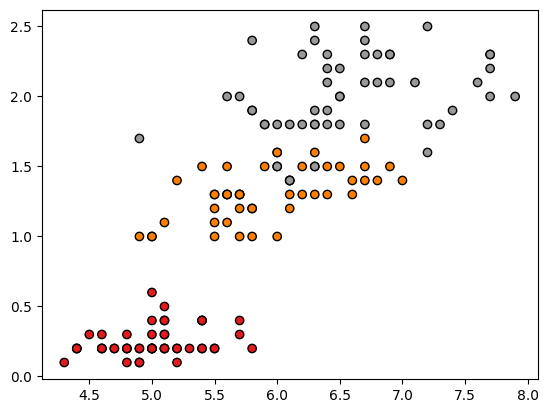

In [2]:
# Visualize the data 
import matplotlib.pyplot as plt
# Plots individual features on different axis 
# Currently: Feature 1 on x, Feature 4 on y
plt.scatter(X[:, 0], X[:, 3], c=t, cmap=plt.cm.Set1,
            edgecolor='k')

In [3]:
# split the data into training and validation
print(X.shape)
print(t)

# let's use 85 % of the data for training and 15 % for validation
# we want a random split of the data
# could be train test split from sklearn 
train_perc = .85
all_data = len(t) # 150

train_until = int(all_data * train_perc)
print(train_until)
X_train = X[0:train_until, :]
t_train = t[0:train_until]
print("-------")
print(X_train[0:5, :])
print(t_train[0:5])
X_val = X[train_until:, :]
t_val = t[train_until:]
print("-------")
print(X_val.shape)
print(t_val.shape)

(150, 4)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
127
-------
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0]
-------
(23, 4)
(23,)


In [4]:
print(t_val)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [5]:
# let's use the train test split of sklearn 
from sklearn.model_selection import train_test_split

X_temp, X_test, t_temp, t_test = train_test_split(
    X, t, test_size=0.2, random_state = 16) # random seed is set completely arbitrary but fixes the sets


X_train, X_val, t_train, t_val = train_test_split(
    X_temp, t_temp, test_size=0.2, random_state = 16)
print(t_val)

[2 2 2 1 1 2 1 0 2 1 0 1 2 0 1 1 0 2 2 0 2 0 2 2]


Now let's implement our first k-nearest neighbor classifier

In [24]:
from sklearn.neighbors import KNeighborsClassifier
bestscore=0.0
bestk=None
for n in range(1,15):
    knn = KNeighborsClassifier(n_neighbors=n)
    model = knn.fit(X_train,t_train)
    score = model.score(X_test, t_test)
    print(score)
    if score > bestscore:
        bestscore = score
        bestk = n
print(f'The best score is {bestscore} with k = {bestk}')

0.9
0.9
0.9666666666666667
0.9666666666666667
0.9333333333333333
0.9333333333333333
0.9333333333333333
0.9333333333333333
0.9333333333333333
0.9333333333333333
0.9333333333333333
0.9333333333333333
0.9
0.9333333333333333
The best score is 0.9666666666666667 with k = 3


In [20]:
# I want a function that outputs the validation accuracy
def accuracy(t, y):
  return sum((y - t) == 0)/ len(y)
print(model.score(X_test, t_test))

#print(accuracy(t_val, y_val))
# for the training error? 
y_train = knn.predict(X_train)
#print(accuracy(t_train, y_train))

0.9333333333333333


In [ ]:
# get differences
print(y_val - t_val)
# get 0 entries (those were predicted correct)
print((y_val - t_val) == 0)
# count all 0 entries
print(sum((y_val - t_val) == 0))
# divide by all entries 
print(sum((y_val - t_val) == 0)/ len(y_val))


Let's try sklearn.metrics.accuracy_score:

In [26]:
from sklearn.metrics import accuracy_score

bestscore=0.0
bestk=None
for n in range(1,15):
    knn = KNeighborsClassifier(n_neighbors=n)
    model = knn.fit(X_train,t_train)
    score = model.accuracy_score(X_test, t_test)
    print(score)
    if score > bestscore:
        bestscore = score
        bestk = n
print(f'The best score is {bestscore} with k = {bestk}')

AttributeError: 'KNeighborsClassifier' object has no attribute 'accuracy_score'

Try different values of $k$ with the knn classifier, from 1 to 10.

In [ ]:
val_accuracies = []
train_accuracies = []

for k in range(1, 16):
  print("Trying ... k=", k)
  # train a new KNN 
  model = KNeighborsClassifier(n_neighbors=k)
  # TODO calculate val_acc and train_acc
  val_accuracies.append(val_acc)
  train_accuracies.append(train_acc)

In [ ]:
%pylab inline
plot(range(1, 16), train_accuracies, label = "Train accuracy")
plot(range(1, 16), val_accuracies, 'r', label="Val accuracy")
xlabel("K values")
ylabel("Accuracies")
legend()

In [ ]:
# What's the highest value of validation accuracies? (That will be the best k)
max_acc = -1
max_index = -1

for index in range(len(val_accuracies)):
  val_acc = val_accuracies[index]
  print(val_acc)
  if val_acc > max_acc:
    max_acc = val_acc
    max_index = index

print("Hightest val acc ", max_acc)
print("At index ", max_index, " K value ", max_index +1)

In [ ]:

# TODO Fill in the best value for k
k = TODO

model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train, y_train)

y_val = model.predict(X_val)
val_acc = model.score(X_val, t_val)

y_train = model.predict(X_train)
train_acc = model.score(X_train, t_train)

y_test = model.predict(X_test)
test_acc = model.score(X_test, t_test)
  

print(f"Train accuracy with k={k}: {train_acc}")
print(f"Val accuracy with k={k}: {val_acc}")
print(f"Test accuracy with k={k}: {test_acc}")

# Logistic regression 
Let's compare the k-NN Classifiactors against a logistic regression classifier.

In [ ]:
from sklearn.linear_model import LogisticRegression

# TODO use logistic regression
# HINT: you can use the classifier.score function to easily calculate the accuracy :)

If we take a look at the dataset, we see that it might be difficult to seperate the classes with a linear model. Do we get an advantage by applying polynomial transformations to our features? 

In [17]:
from sklearn.preprocessing import PolynomialFeatures

# TODO apply different polynomial degrees to the features

In [ ]:
# TODO use the transformed features for classification and evaluation


Make sure to test the best polynomial degree on the test set:

In [ ]:
# TODO calculate accuracy of best polynomial degree on test set 

Now compare how well k-NN performs using the transformed features

In [ ]:
# TODO train and evaluate k-NN on transformed features